<a href="https://colab.research.google.com/github/blakedshull/datascience/blob/main/Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

I am sorry, I accidentally uploaded the wrong file.  This was my exploration and the data sets will be on the github link.  I uploaded both tables to my github under data science as well

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Upon exploring I would like to use my second choice, Taiwanese real estate

# My first choice was this data on credit card defaults, it is not anymore.  I did both because I messed up my submission last week

In [3]:
filename = '/content/default of credit card clients.csv'
df = pd.read_csv(filename)
new_header = df.iloc[0] 
df = df[1:] 
df.columns = new_header
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
df.shape

(30000, 25)

### 1) Source of data

I found this data on UCI's machine learning repository.  It is data on credit card defaults, also in Taiwan.

### 2) Brief description of data
There are 30,000 data points, with a wide variety of data including their card limit, gender (1 = male; 2 = female), education, marriage, age, education (1 = graduate school; 2 = university; 3 = high school; 4 = others), Marital status (1 = married; 2 = single; 3 = others), history of payments (X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months, etc)
X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005. 

### 3) What is the target?
The target is the default payment next month (1 = yes 0 = no)

### 4) Is this a classification or regression problem?
This is a classification problem, people fit into yes or no.

### 5) How many features?
25

### 6) How many rows of data.
There are 30,000 rows of data.

### 7) What, if any, challenges do your foresee in cleaning, exploring, or modeling with this dataset?
One challenge in this data set is not organized perfectly, I will probably have to rework history of payments, amount of bill statement per month, and amount of prev payment.

In [5]:
df.dtypes

0
ID                            object
LIMIT_BAL                     object
SEX                           object
EDUCATION                     object
MARRIAGE                      object
AGE                           object
PAY_0                         object
PAY_2                         object
PAY_3                         object
PAY_4                         object
PAY_5                         object
PAY_6                         object
BILL_AMT1                     object
BILL_AMT2                     object
BILL_AMT3                     object
BILL_AMT4                     object
BILL_AMT5                     object
BILL_AMT6                     object
PAY_AMT1                      object
PAY_AMT2                      object
PAY_AMT3                      object
PAY_AMT4                      object
PAY_AMT5                      object
PAY_AMT6                      object
default payment next month    object
dtype: object

In [6]:
df.duplicated().sum()

0

In [7]:
df.isna().sum()

0
ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

Renaming for consistency


In [11]:
df = df.rename(columns={'PAY_0': 'PAY_1'})

Making objects numerical

In [12]:
cols = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce', axis=1)

Making a column more readable

I am just organizing the data, I am going to ordinally encode and onehotencode it properly once I have to do regression

In [13]:
df['SEX'] = df['SEX'].replace(1, 'Male')
df['SEX'] = df['SEX'].replace(2, 'Female')

In [53]:
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [54]:
df['EDUCATION'] = df['EDUCATION'].replace('0', 'Unknown')
df['EDUCATION'] = df['EDUCATION'].replace('1', 'Graduate School')
df['EDUCATION'] = df['EDUCATION'].replace('2', 'University')
df['EDUCATION'] = df['EDUCATION'].replace('3', 'High School')
df['EDUCATION'] = df['EDUCATION'].replace('4', "Didn't Graduate Highschool")
df['EDUCATION'] = df['EDUCATION'].replace('5', 'No Highschool')
df['EDUCATION'] = df['EDUCATION'].replace('6', 'No known schooling')

In [15]:
df['MARRIAGE'] = df['MARRIAGE'].replace(1, 'Married')
df['MARRIAGE'] = df['MARRIAGE'].replace(2, 'Single')
df['MARRIAGE'] = df['MARRIAGE'].replace(3, 'Other')

In [27]:
df['default payment next month'] = df['default payment next month'].replace('1', 'Yes')
df['default payment next month'] = df['default payment next month'].replace('0', 'No')

Formatting to use 0 for an ontime payment.

In [33]:
cols2 = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
df[cols2] = df[cols2].apply(pd.to_numeric, errors='coerce', axis=1)

In [35]:
df[cols2] = df[cols2].replace(-2, -1)
df[cols2] = df[cols2].replace(-1, 0)

In [19]:
df.dtypes

0
ID                            object
LIMIT_BAL                      int64
SEX                           object
EDUCATION                     object
MARRIAGE                      object
AGE                            int64
PAY_1                          int64
PAY_2                          int64
PAY_3                          int64
PAY_4                          int64
PAY_5                          int64
PAY_6                          int64
BILL_AMT1                      int64
BILL_AMT2                      int64
BILL_AMT3                      int64
BILL_AMT4                      int64
BILL_AMT5                      int64
BILL_AMT6                      int64
PAY_AMT1                       int64
PAY_AMT2                       int64
PAY_AMT3                       int64
PAY_AMT4                       int64
PAY_AMT5                       int64
PAY_AMT6                       int64
default payment next month    object
dtype: object

Outlier checking on columns that count

In [29]:
df['LIMIT_BAL'].describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

In [31]:
df['AGE'].describe()

count    30000.000000
mean        35.485500
std          9.217904
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: AGE, dtype: float64

In [36]:
df['PAY_1'].describe()

count    30000.000000
mean         0.356767
std          0.760594
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          8.000000
Name: PAY_1, dtype: float64

In [37]:
df['PAY_2'].describe()

count    30000.000000
mean         0.320033
std          0.801727
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          8.000000
Name: PAY_2, dtype: float64

In [38]:
df['PAY_3'].describe()

count    30000.000000
mean         0.304067
std          0.790589
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          8.000000
Name: PAY_3, dtype: float64

In [39]:
df['PAY_4'].describe()

count    30000.000000
mean         0.258767
std          0.761113
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          8.000000
Name: PAY_4, dtype: float64

In [40]:
df['PAY_5'].describe()

count    30000.00000
mean         0.22150
std          0.71772
min          0.00000
25%          0.00000
50%          0.00000
75%          0.00000
max          8.00000
Name: PAY_5, dtype: float64

In [41]:
df['PAY_6'].describe()

count    30000.000000
mean         0.226567
std          0.715438
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          8.000000
Name: PAY_6, dtype: float64

I just found a negative credit card bill on this one so I don't know if it is useable, I assume it should just be turned positive though

In [49]:
cols3 = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
df[cols3] = df[cols3].abs()

In [50]:
print(df['BILL_AMT1'].describe())
print(df['BILL_AMT2'].describe())
print(df['BILL_AMT3'].describe())
print(df['BILL_AMT4'].describe())
print(df['BILL_AMT5'].describe())
print(df['BILL_AMT6'].describe())

count     30000.000000
mean      51268.752900
std       73604.241808
min           0.000000
25%        3593.500000
50%       22385.500000
75%       67124.750000
max      964511.000000
Name: BILL_AMT1, dtype: float64
count     30000.000000
mean      49233.960900
std       71135.811734
min           0.000000
25%        3051.500000
50%       21231.500000
75%       64022.500000
max      983931.000000
Name: BILL_AMT2, dtype: float64
count    3.000000e+04
mean     4.707718e+04
std      6.930594e+04
min      0.000000e+00
25%      2.776000e+03
50%      2.010450e+04
75%      6.017775e+04
max      1.664089e+06
Name: BILL_AMT3, dtype: float64
count     30000.000000
mean      43336.354900
std       64283.429153
min           0.000000
25%        2400.000000
50%       19068.000000
75%       54558.500000
max      891586.000000
Name: BILL_AMT4, dtype: float64
count     30000.000000
mean      40382.783233
std       60749.763983
min           0.000000
25%        1865.000000
50%       18126.500000
75%   

In [48]:
print(df['PAY_AMT1'].describe())
print(df['PAY_AMT2'].describe())
print(df['PAY_AMT3'].describe())
print(df['PAY_AMT4'].describe())
print(df['PAY_AMT5'].describe())
print(df['PAY_AMT6'].describe())

count     30000.000000
mean       5663.580500
std       16563.280354
min           0.000000
25%        1000.000000
50%        2100.000000
75%        5006.000000
max      873552.000000
Name: PAY_AMT1, dtype: float64
count    3.000000e+04
mean     5.921163e+03
std      2.304087e+04
min      0.000000e+00
25%      8.330000e+02
50%      2.009000e+03
75%      5.000000e+03
max      1.684259e+06
Name: PAY_AMT2, dtype: float64
count     30000.00000
mean       5225.68150
std       17606.96147
min           0.00000
25%         390.00000
50%        1800.00000
75%        4505.00000
max      896040.00000
Name: PAY_AMT3, dtype: float64
count     30000.000000
mean       4826.076867
std       15666.159744
min           0.000000
25%         296.000000
50%        1500.000000
75%        4013.250000
max      621000.000000
Name: PAY_AMT4, dtype: float64
count     30000.000000
mean       4799.387633
std       15278.305679
min           0.000000
25%         252.500000
50%        1500.000000
75%        4031.50

Text(0, 0.5, 'Limit Balance')

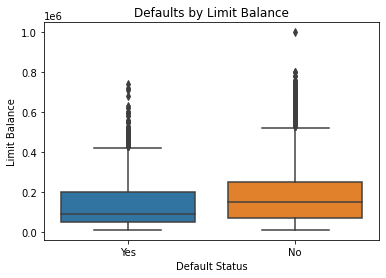

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(x='default payment next month', y='LIMIT_BAL', data=df)
plt.title("Defaults by Limit Balance")
plt.xlabel("Default Status")
plt.ylabel("Limit Balance")

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

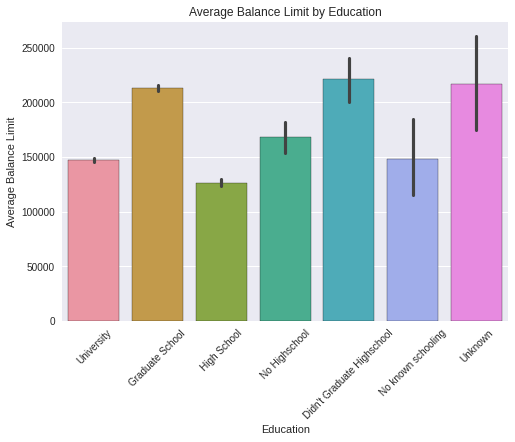

In [57]:
plt.style.use('seaborn')
sns.barplot(data = df, x = 'EDUCATION', y = 'LIMIT_BAL', edgecolor='black')
plt.title("Average Balance Limit by Education")
plt.xlabel("Education")
plt.ylabel("Average Balance Limit")
plt.xticks(rotation = 45)

# My second choice is Taiwanese Real Estate data.

In [60]:
filename2 = '/content/Real estate valuation data set.xlsx'
df2 = pd.read_excel(filename2)
df2.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [61]:
df2.shape

(414, 8)

Everything is the right data type

In [62]:
df2.dtypes

No                                          int64
X1 transaction date                       float64
X2 house age                              float64
X3 distance to the nearest MRT station    float64
X4 number of convenience stores             int64
X5 latitude                               float64
X6 longitude                              float64
Y house price of unit area                float64
dtype: object

Checking for duplicates

In [64]:
df2.duplicated().sum()

0

Renaming columns for legibility

In [72]:
df2 = df2.rename(columns={'X1 transaction date': 'transaction date', 'X2 house age': 'house age', 'X3 distance to the nearest MRT station': 'distance to the nearest MRT station',
                          'X4 number of convenience stores': 'number of convenience stores', 'X5 latitude': 'latitude', 'X6 longitude': 'longitude', 
                          'Y house price of unit area': 'house price of unit area'})

In [73]:
df2.isna().sum()

No                                     0
transaction date                       0
house age                              0
distance to the nearest MRT station    0
number of convenience stores           0
latitude                               0
longitude                              0
house price of unit area               0
dtype: int64

Checking for outliers: no outliers

In [74]:
df2.describe()

,No,transaction date,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


Scatter plots are the best way to interpret this data because they are for two numerical variables, and all of these columns are numerical

Text(0, 0.5, 'Age')

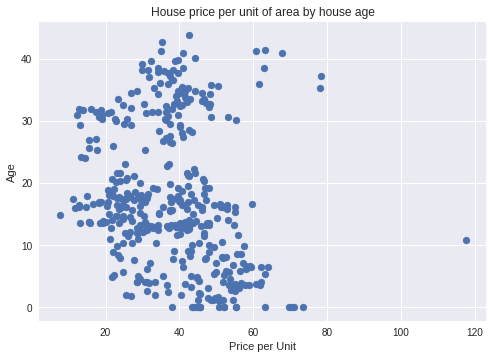

In [78]:
plt.scatter(data = df2, x = 'house price of unit area', y = 'house age')
plt.title("House price per unit of area by house age")
plt.xlabel("Price per Unit")
plt.ylabel("Age")

There is definitely one outlier in price per unit, as seen on both graphs

Text(0, 0.5, 'Distance to nearest mass rapid transit')

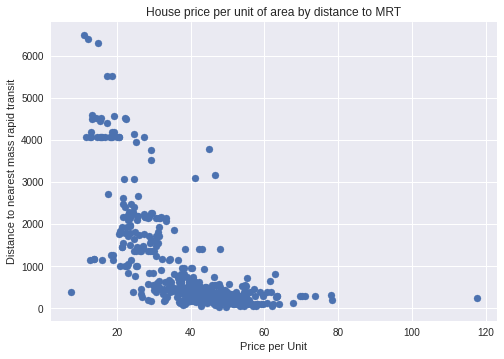

In [79]:
plt.scatter(data = df2, x = 'house price of unit area', y = 'distance to the nearest MRT station')
plt.title("House price per unit of area by distance to MRT")
plt.xlabel("Price per Unit")
plt.ylabel("Distance to nearest mass rapid transit")

There seem to be two or three homes that are extremely far out from MRT, probably rural

### 1) Source of data

I found this data on UCI's machine learning repository.  It is gathered from Taiwan.

### 2) Brief description of data
This table contains  414 houses, sale date, age of house, distance to mass rapid transit station, number of conveience stores within walking distance, latitude, longitude, and price per ping (1 ping = 3.3m squared)
### 3) What is the target?
The target is the house price of unit area.  

### 4) Is this a classification or regression problem?
This is a regression problem, price is a numerical set of values.

### 5) How many features?
8, although 1 of them is just ID and is therefore useless.

### 6) How many rows of data.
There are 414 rows of data.

### 7) What, if any, challenges do your foresee in cleaning, exploring, or modeling with this dataset?
One challenge in this data set is the limited area, this is only one district in one city.  

This data is also old, it may not be as useful.